# Session 2. Regression

Course info: https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp

Note: it is good practice to clear the outputs before pushing, however, here the complete notebook is pushed as it is a small notebook and the goal is to see the answers to the questions.


### EDA

In [1]:
# Load the data

import pandas as pd

#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
#!wget $data

path = "/home/mmc/Desktop/DataTalks/data/"
df_original = pd.read_csv(path + "AB_NYC_2019.csv")
df_original.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Look at the price variable. Does it have a long tail?

<AxesSubplot:xlabel='price', ylabel='Count'>

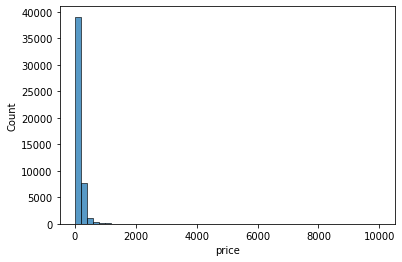

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df_original.price, bins=50)

The distribution has a heavy tail, we will later take the logarithm so it becomes more normal:

<AxesSubplot:xlabel='price', ylabel='Count'>

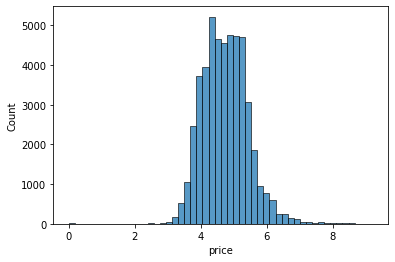

In [3]:
import numpy as np
price_logs = np.log1p(df_original.price)
sns.histplot(price_logs,bins = 50)

Features: for the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'

Select only them.

In [4]:
df = df_original.copy()
df = df[['latitude','longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


Visual normality check.

In [5]:
if False: # True:
    fig, axes = plt.subplots(2, 4, figsize=(14, 6))
    fig.suptitle('Histograms')

    sns.histplot(ax=axes[0, 0], data= df.latitude, bins=50)
    sns.histplot(ax=axes[0, 1], data= df.longitude, bins=50)
    sns.histplot(ax=axes[0, 2], data= df.price, bins=50)
    sns.histplot(ax=axes[0, 3], data= df.minimum_nights, bins=25)
    sns.histplot(ax=axes[1, 0], data= df.number_of_reviews, bins=25)
    sns.histplot(ax=axes[1, 1], data= df.reviews_per_month, bins=25)
    sns.histplot(ax=axes[1, 2], data= df.calculated_host_listings_count, bins=25)
    sns.histplot(ax=axes[1, 3], data= df.availability_365, bins=25)

Apply logarithm to those with a heavy tail.

In [6]:
if False:#True:
    fig, axes = plt.subplots(2, 4, figsize=(14, 6))
    fig.suptitle('Histograms')

    price_log         = np.log1p(df.price)
    min_nights_log    = np.log1p(df.minimum_nights)
    no_reviews_log    = np.log1p(df.number_of_reviews)
    reviews_month_log = np.log1p(df.reviews_per_month)
    calc_host_listings_count_log  = np.log1p(df.calculated_host_listings_count)
    avail_365_log = np.log1p(df.availability_365)
         
    sns.histplot(ax=axes[0, 0], data= df.latitude, bins=50)
    sns.histplot(ax=axes[0, 1], data= df.longitude, bins=50)
    sns.histplot(ax=axes[0, 2], data= price_log, bins=50)
    sns.histplot(ax=axes[0, 3], data= min_nights_log, bins=25)
    sns.histplot(ax=axes[1, 0], data= no_reviews_log, bins=25)
    sns.histplot(ax=axes[1, 1], data= reviews_month_log, bins=25)
    sns.histplot(ax=axes[1, 2], data= calc_host_listings_count_log, bins=25)
    sns.histplot(ax=axes[1, 3], data= avail_365_log, bins=25)

### Question 1

Find a feature with missing values. How many missing values does it have?

In [7]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [8]:
np.median(df.minimum_nights.values)

3.0

[3 3 3 3 3]


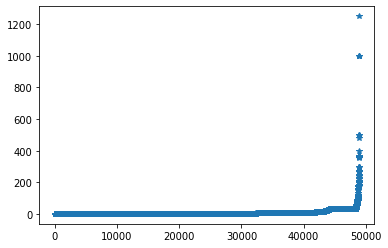

In [9]:
print(np.sort(df["minimum_nights"])[24445:24450])  # 48895/2 = 24447
plt.plot(np.sort(df["minimum_nights"]),'*')

### Split the data

+ Shuffle the initial dataset, use seed 42.
+ Split your data in train/val/test sets, with 60%/20%/20% distribution.
+ Make sure that the target value ('price') is not in your dataframe.
+ Apply the log transformation to the price variable using the np.log1p() function.


In [10]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# the features
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# the target: take logarithm to make the heavy tail distribution more normal
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# remove target from the features matrix
del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable. Try both options. For computing the mean, use the training only!

For each, train a linear regression model without regularization using the code from the lesssons.

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [11]:
# DEFINE FUNCIONS

# Prepare data
def prepare_X_zero(df):
    df = df.copy()
    df.reviews_per_month = df.reviews_per_month.fillna(0) # replace NaNs with zeros
    X = df.values  # convert to np array
    return X

rev_train_mean = df_train.reviews_per_month.mean() # calculate the mean of the training set
def prepare_X_mean(df, mean = rev_train_mean):
    df = df.copy()
    df.reviews_per_month = df.reviews_per_month.fillna(mean) # replace NaNs with the mean of the training set
    X = df.values  # convert to np array
    return X

# Train model  
def train_linear_regression(X, y):  
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Metric to evaluate the model performance
def rmse(y, y_pred):
    error = y_pred - y
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [12]:
# OPTION 1: Replacing NaNs with zero
if True:#False:#True:

    # run
    X_train = prepare_X_zero(df_train)  # prepare data
    w_0, w = train_linear_regression(X_train, y_train)# run the model to get prediction
    y_pred = w_0 + X_train.dot(w)  # apply model
    metric = rmse(y_train, y_pred) # evaluate metric
    print("RMSE for training:", metric.round(2)) 

    # validate
    X_val = prepare_X_zero(df_val)  # prepare data
    y_pred = w_0 + X_val.dot(w)  # apply model, DO NOT RUN IT AGAIN
    metric = rmse(y_val, y_pred) # evaluate metric
    print("RMSE for validation:", metric.round(2)) 
#RMSE for training: 0.6428860484860427
#RMSE for validation: 0.643033778856463

RMSE for training: 0.64
RMSE for validation: 0.64


In [13]:
# OPTION 2: Replacing NaNs with train mean
if False:#True:
    
    # run
    X_train = prepare_X_mean(df_train)  # prepare data
    w_0, w = train_linear_regression(X_train, y_train)# run the model to get prediction
    y_pred = w_0 + X_train.dot(w)  # apply model
    metric = rmse(y_train, y_pred) # evaluate metric
    print("RMSE for training:", metric.round(2)) 
    
    # validate
    X_val = prepare_X_mean(df_val)  # prepare data
    y_pred = w_0 + X_val.dot(w)  # apply model, DO NOT RUN IT AGAIN
    metric = rmse(y_val, y_pred) # evaluate metric
    print("RMSE for validation:", metric.round(2))

    #RMSE for training: 0.6429347474014219
    #RMSE for validation: 0.6427545031776444

Both options give similar RMSE

### Question 4

Now let's train a regularized linear regression.

For this question, fill the NANs with 0 (so we set "False" in the cell that uses the mean above).

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE? If there are multiple options, select the smallest r.

In [14]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score.round(2))

0 -419.91265872315813 0.64
1e-06 -419.8627156612891 0.64
0.0001 -414.97649241546526 0.64
0.001 -375.2736526945097 0.64
0.01 -191.7838405121791 0.66
0.1 -32.56256055279646 0.68
1 -3.499216837025976 0.68
5 -0.7033623164576596 0.68
10 -0.35127676049422046 0.68


### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    
Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [15]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for my_seed in seeds:
    print(my_seed)
    df_s = df.copy()
    
    np.random.seed(my_seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_s_shuffled = df_s.iloc[idx]
    
    # the features
    df_s_train = df_s_shuffled.iloc[:n_train]
    df_s_val = df_s_shuffled.iloc[n_train:n_train+n_val]
    
    # the target: take logarithm to make the heavy tail distribution more normal
    y_s_train = np.log1p(df_s_train.price.values)
    y_s_val = np.log1p(df_s_val.price.values)

    # remove target from the features matrix
    del df_s_train['price']
    del df_s_val['price']
    
    # run
    X_train = prepare_X_zero(df_s_train)  # prepare data
    w_0, w = train_linear_regression(X_train, y_s_train)# run the model to get prediction
    y_s_pred = w_0 + X_train.dot(w)  # apply model
    
    # validate
    X_val = prepare_X_zero(df_s_val)  # prepare data
    y_s_pred = w_0 + X_val.dot(w)  # apply model
    metric = rmse(y_s_val, y_s_pred) # evaluate metric
    print("RMSE for validation with seed", my_seed, "is", metric.round(3)) 
    
    scores.append(metric.round(3))

0
RMSE for validation with seed 0 is 0.655
1
RMSE for validation with seed 1 is 0.646
2
RMSE for validation with seed 2 is 0.648
3
RMSE for validation with seed 3 is 0.638
4
RMSE for validation with seed 4 is 0.645
5
RMSE for validation with seed 5 is 0.631
6
RMSE for validation with seed 6 is 0.63
7
RMSE for validation with seed 7 is 0.651
8
RMSE for validation with seed 8 is 0.649
9
RMSE for validation with seed 9 is 0.644


In [16]:
print(scores)
# std of the scores
print("STD of scores:",np.std(scores).round(3))

[0.655, 0.646, 0.648, 0.638, 0.645, 0.631, 0.63, 0.651, 0.649, 0.644]
STD of scores: 0.008


### Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [17]:
df1 = df_original.copy()
df1 = df[['latitude','longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']]

my_seed = 9
np.random.seed(my_seed)
idx = np.arange(n)
np.random.shuffle(idx)
df1_shuffled = df1.iloc[idx]

    
# the features
df1_train = df1_shuffled.iloc[:n_train]
df1_val = df1_shuffled.iloc[n_train:n_train+n_val]
df1_test = df1_shuffled.iloc[n_train+n_val:]

# the target: take logarithm to make the heavy tail distribution more normal
y1_train = np.log1p(df1_train.price.values)
y1_val = np.log1p(df1_val.price.values)
y1_test = np.log1p(df1_test.price.values)

# remove target from the features matrix
del df1_train['price']
del df1_val['price']
del df1_test['price']

# join the train and val data sets
df_full_train = pd.concat([df1_train, df1_val]).reset_index(drop=True)
y_full_train = np.concatenate([y1_train, y1_val])

# fill nans with zeros and convert to np.array
X_full_train = prepare_X_zero(df_full_train) 

# define train function with regularzation
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# train with the training and validation sets together
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# apply on test
X_test = prepare_X_zero(df1_test)
y1_pred = w0 + X_test.dot(w)
score = rmse(y1_test, y1_pred)
print("RMSE of the model on the test data set is",score.round(2))

RMSE of the model on the test data set is 0.65
